# Furniture Sales Forecasting Dataset

## Dataset Overview
This dataset contains sales transaction data for a furniture store in the United States. It includes detailed information about customer orders, products sold, shipping modes, and financial metrics such as sales, profit, and discounts. The data spans multiple years, making it suitable for analyzing sales trends over time and forecasting future sales.

### Key Features:
- **Order Information**:
  - `Order Date`, `Ship Date`: Dates associated with the order and shipment.
  - `Ship Mode`: Mode of shipping (e.g., Standard Class, Second Class).
  - `Order ID`: Unique identifier for each order.
- **Customer Details**:
  - `Customer ID`, `Customer Name`: Information about customers.
  - `Segment`: Customer segment (e.g., Consumer, Corporate, Home Office).
- **Product Details**:
  - `Category`, `Sub-Category`: Product category and sub-category.
  - `Product Name`, `Product ID`: Descriptions and unique IDs for products.
- **Financial Metrics**:
  - `Sales`: Total sales value of the transaction.
  - `Profit`: Profit from the transaction.
  - `Discount`: Discount applied to the sale.
  - `Quantity`: Number of items sold.
- **Geographic Information**:
  - `Region`, `City`, `Postal Code`: Location details for each transaction.

## Project Purpose
The goal of this data analysis project is to understand sales patterns and forecast future sales for the furniture store. Specifically, we aim to:

1. **Analyze Sales Trends**: Identify seasonal trends, peak sales periods, and the performance of different product categories and regions.
2. **Optimize Inventory Management**: Predict demand to ensure the store maintains an optimal stock level.
3. **Improve Business Decision-Making**: Provide actionable insights to improve profitability and enhance customer satisfaction.
4. **Sales Forecasting**: Develop predictive models to forecast future sales based on historical data.

By conducting this analysis, we can help the business plan better for the future, optimize operations, and boost overall profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_forecasting.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
# let's make the columns names look nicer
df.columns = df.columns.str.replace(' ','_').str.replace('-','_')

In [4]:
# overall look on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         2121 non-null   int64  
 1   Order_ID       2121 non-null   object 
 2   Order_Date     2121 non-null   object 
 3   Ship_Date      2121 non-null   object 
 4   Ship_Mode      2121 non-null   object 
 5   Customer_ID    2121 non-null   object 
 6   Customer_Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal_Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product_ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub_Category   2121 non-null   object 
 16  Product_Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [5]:
# removing some high cardinality columns (won't be useful for analysis)
del df['Row_ID']
del df['Customer_Name']
del df['Postal_Code']
del df['Category']
del df['Product_ID']
del df['Country']

In [6]:
# renaming some columns for better understanding 
df = df.rename(columns={
    'Sub_Category' : 'Category',
    'Product_Name' : 'Product',
    'Sales' : 'Total_Sales'
})

In [7]:
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Region,Category,Product,Total_Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Consumer,Los Angeles,California,West,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Consumer,Los Angeles,California,West,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order_ID     2121 non-null   object 
 1   Order_Date   2121 non-null   object 
 2   Ship_Date    2121 non-null   object 
 3   Ship_Mode    2121 non-null   object 
 4   Customer_ID  2121 non-null   object 
 5   Segment      2121 non-null   object 
 6   City         2121 non-null   object 
 7   State        2121 non-null   object 
 8   Region       2121 non-null   object 
 9   Category     2121 non-null   object 
 10  Product      2121 non-null   object 
 11  Total_Sales  2121 non-null   float64
 12  Quantity     2121 non-null   int64  
 13  Discount     2121 non-null   float64
 14  Profit       2121 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 248.7+ KB


In [9]:
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Region,Category,Product,Total_Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Consumer,Los Angeles,California,West,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Consumer,Los Angeles,California,West,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [10]:
df['Total_Sales'] = round(df['Total_Sales'], 2)
df['Profit'] = round(df['Profit'], 2)

In [11]:
# checking for duplicate values
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2120 entries, 0 to 2120
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order_ID     2120 non-null   object 
 1   Order_Date   2120 non-null   object 
 2   Ship_Date    2120 non-null   object 
 3   Ship_Mode    2120 non-null   object 
 4   Customer_ID  2120 non-null   object 
 5   Segment      2120 non-null   object 
 6   City         2120 non-null   object 
 7   State        2120 non-null   object 
 8   Region       2120 non-null   object 
 9   Category     2120 non-null   object 
 10  Product      2120 non-null   object 
 11  Total_Sales  2120 non-null   float64
 12  Quantity     2120 non-null   int64  
 13  Discount     2120 non-null   float64
 14  Profit       2120 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 265.0+ KB


In [14]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2120 entries, 0 to 2120
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order_ID     2120 non-null   object        
 1   Order_Date   2120 non-null   datetime64[ns]
 2   Ship_Date    2120 non-null   datetime64[ns]
 3   Ship_Mode    2120 non-null   object        
 4   Customer_ID  2120 non-null   object        
 5   Segment      2120 non-null   object        
 6   City         2120 non-null   object        
 7   State        2120 non-null   object        
 8   Region       2120 non-null   object        
 9   Category     2120 non-null   object        
 10  Product      2120 non-null   object        
 11  Total_Sales  2120 non-null   float64       
 12  Quantity     2120 non-null   int64         
 13  Discount     2120 non-null   float64       
 14  Profit       2120 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(9)
memory

In [16]:
df.head(2)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Region,Category,Product,Total_Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58


In [17]:
df['Price_Each'] = df['Total_Sales'] / df['Quantity']

In [18]:
df.head(2)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Region,Category,Product,Total_Sales,Quantity,Discount,Profit,Price_Each
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91,130.98
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58,243.98


In [19]:
print("""These are the prices for the whole products sorted from lowest to highest
""")
round(df[['Product','Price_Each']].drop_duplicates().sort_values('Price_Each',ascending=True), 2)

These are the prices for the whole products sorted from lowest to highest



,Product,Price_Each
231,"GE General Purpose, Extra Long Life, Showcase ...",1.16
2084,Longer-Life Soft White Bulbs,1.23
300,Longer-Life Soft White Bulbs,1.23
1936,OIC Stacking Trays,1.34
55,Eldon 100 Class Desk Accessories,1.35
...,...,...
2001,HON 5400 Series Task Chairs for Big and Tall,630.88
1070,HON 5400 Series Task Chairs for Big and Tall,700.98
1232,"Riverside Palais Royal Lawyers Bookcase, Royal...",704.78
1651,"Riverside Palais Royal Lawyers Bookcase, Royal...",748.84


In [20]:
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Segment', 'City', 'State', 'Region', 'Category', 'Product',
       'Total_Sales', 'Quantity', 'Discount', 'Profit', 'Price_Each'],
      dtype='object')

In [21]:
new_order = ['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Segment', 'City', 'State', 'Region', 'Category', 'Product', 'Total_Sales', 'Price_Each',
       'Quantity', 'Discount', 'Profit']
df = df.reindex(columns=new_order)
df.head(2)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Region,Category,Product,Total_Sales,Price_Each,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.96,130.98,2,0.0,41.91
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,243.98,3,0.0,219.58


# Order Analysis

In this section, we will analyze the orders in the dataset with a focus on:

- **Number of Orders Placed for Each Product Category**: A breakdown of how many orders were placed for each category.
- **Most Common Product Sold**: Identifying the product with the highest sales frequency.

This will help us understand the distribution of orders across categories and highlight the most popular product.

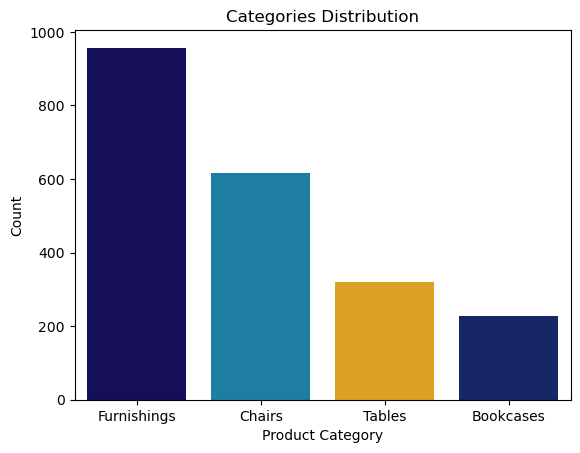

In [22]:
colors = ['#090364','#0888b7','#f9ac07','#091e75']
palette = sns.color_palette(colors)
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values, palette = palette)
plt.title('Categories Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

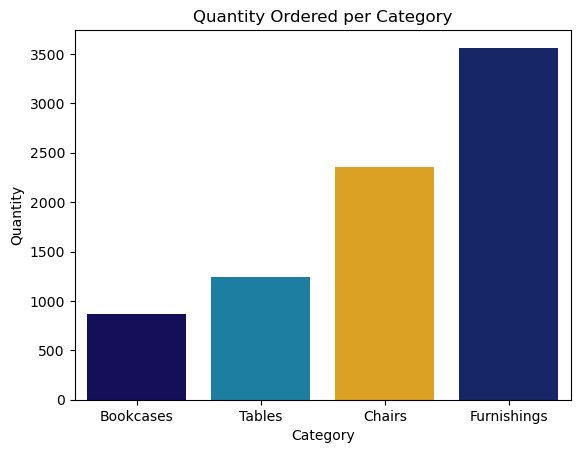

In [23]:
colors = ['#090364','#0888b7','#f9ac07','#091e75']
palette = sns.color_palette(colors)
category_analysis = df.groupby('Category')['Quantity'].sum().sort_values(ascending=True)
sns.barplot(x=category_analysis.index, y=category_analysis.values, palette=palette)
plt.title('Quantity Ordered per Category')
plt.ylabel('Quantity')
plt.show()
# for the furnishings it is the most category having products sold in this dataset

In [24]:
print("""
List For all products sold and quantity sold for each one.
""")
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)


List For all products sold and quantity sold for each one.



Product
KI Adjustable-Height Table                                                   74
Situations Contoured Folding Chairs, 4/Set                                   64
Staple-based wall hangings                                                   62
Chromcraft Round Conference Tables                                           61
Eldon Wave Desk Accessories                                                  61
                                                                             ..
Atlantic Metals Mobile 2-Shelf Bookcases, Custom Colors                       3
Ultra Commercial Grade Dual Valve Door Closer                                 2
Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops             2
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs                  1
Name: Quantity, Length: 380, dtype: int64

# Regional Analysis

In [25]:
df['Region'].value_counts()

Region
West       707
East       600
Central    481
South      332
Name: count, dtype: int64

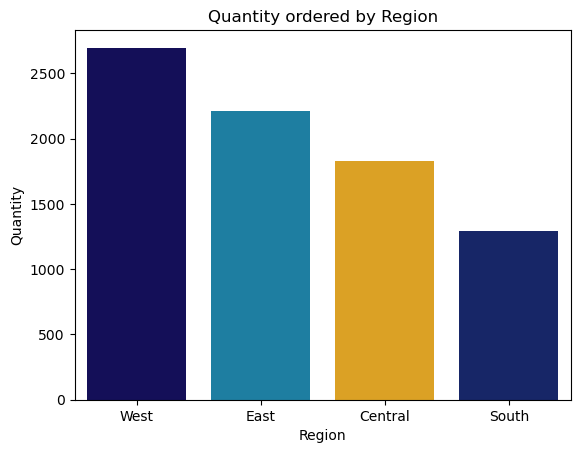

In [26]:
colors = ['#090364','#0888b7','#f9ac07','#091e75']
palette = sns.color_palette(colors)
region_orders = df.groupby('Region')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=region_orders.index, y=region_orders.values, palette=palette)
plt.title('Quantity ordered by Region')
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.show()

In [27]:
print("""
Quantity ordered, Sales and Profit for each state (sorted from Quantity Analysis Prespective).""")
state_financials = df.groupby('State')[['Quantity', 'Total_Sales','Profit']].sum()
state_financials.sort_values(by='Quantity', ascending=False)


Quantity ordered, Sales and Profit for each state (sorted from Quantity Analysis Prespective).


,Quantity,Total_Sales,Profit
State,,,
California,1696,156064.61,9162.87
New York,877,93372.69,5857.71
Texas,766,60593.27,-10436.14
Pennsylvania,487,39354.91,-7196.71
Illinois,448,28274.52,-9076.30
Washington,429,48020.16,7193.78
Ohio,342,23917.76,-4194.33
Florida,299,22987.04,-2255.02
Virginia,233,25321.95,5204.34


In [67]:
print("""
Quantity ordered, Sales and Profit for each state (sorted from Quantity Analysis Prespective)
Top and Bottom 5 Cities :""")
state_financials = df.groupby('City')[['Quantity', 'Total_Sales','Profit']].sum()
state_financials.sort_values(by='Quantity', ascending=False)


Quantity ordered, Sales and Profit for each state (sorted from Quantity Analysis Prespective)
Top and Bottom 5 Cities :


,Quantity,Total_Sales,Profit
City,,,
New York City,720,75691.03,5306.72
Los Angeles,588,54000.03,3071.61
Philadelphia,449,36495.51,-6827.12
San Francisco,399,36357.30,1491.36
Seattle,370,40995.88,6208.83
...,...,...,...
Cincinnati,1,79.38,29.77
Thousand Oaks,1,22.72,9.32
Cambridge,1,26.72,11.76


# Sales Analysis

In [28]:
print("""
Total sales and profit by category.""")
category_financials = df.groupby('Category')[['Total_Sales', 'Profit']].sum()
category_financials.sort_values(by='Total_Sales', ascending=False)


Total sales and profit by category.


,Total_Sales,Profit
Category,,
Chairs,328167.73,26602.14
Tables,206965.53,-17725.57
Bookcases,114879.98,-3472.59
Furnishings,91705.12,13059.18


In [64]:
print("""
Quantity ordered, Sales and Profit for each state (sorted from Profit Analysis Prespective).""")
state_financials = df.groupby('State')[['Quantity', 'Total_Sales','Profit']].sum()
state_financials.sort_values(by='Total_Sales', ascending=False)


Quantity ordered, Sales and Profit for each state (sorted from Profit Analysis Prespective).


,Quantity,Total_Sales,Profit
State,,,
California,1696,156064.61,9162.87
New York,877,93372.69,5857.71
Texas,766,60593.27,-10436.14
Washington,429,48020.16,7193.78
Pennsylvania,487,39354.91,-7196.71
Illinois,448,28274.52,-9076.30
Virginia,233,25321.95,5204.34
Ohio,342,23917.76,-4194.33
Florida,299,22987.04,-2255.02


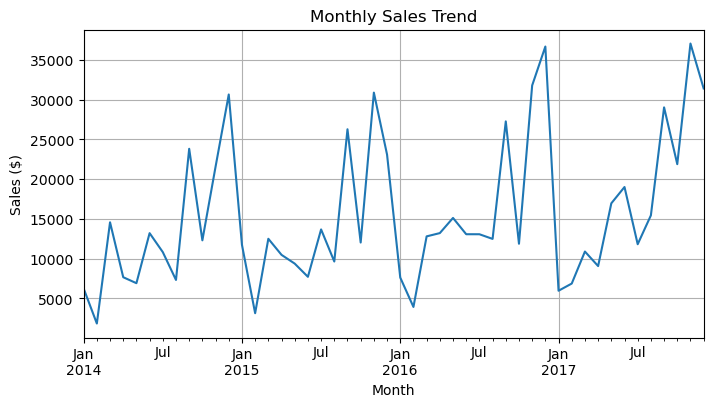

In [78]:
# sales trend by quarter year
# as showing a the line of sales tend to increase 
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Total_Sales'].sum()
monthly_sales.plot(title='Monthly Sales Trend', xlabel='Month', ylabel='Sales ($)', figsize=(8, 4))
plt.grid(True)
plt.show()

### Monthly Sales Trend Analysis

- The plot above shows the **monthly sales trend** from January 2014 to December 2017.
- Sales exhibit a **seasonal pattern** with periodic peaks and dips, suggesting possible fluctuations due to specific factors such as holidays, promotions, or seasonal demands.
- Significant spikes can be observed in months like **November and December**, which could align with events like **Black Friday** or **holiday shopping seasons**.
- There are also noticeable **sales drops**, such as around mid-2015 and early 2017. These could indicate either slow business periods or external market factors.
- The overall trend shows **steady growth in sales** over the four years, with higher peaks observed in later years (2016 and 2017), indicating the store's improving performance.


In [31]:
# total sales
total_sales = round(df['Total_Sales'].sum(), 2)
print(f"Total Sales = ${total_sales}")

Total Sales = $741718.36


In [32]:
# total profit 
total_profit = round(df['Profit'].sum(), 2)
print(f"Total Profit = ${total_profit}")

Total Profit = $18463.16


In [33]:
df.head(2)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Region,Category,Product,Total_Sales,Price_Each,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.96,130.98,2,0.0,41.91
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,243.98,3,0.0,219.58


In [35]:
# average discout per category
round(df.groupby('Category')['Discount'].mean(), 2)

Category
Bookcases      0.21
Chairs         0.17
Furnishings    0.14
Tables         0.26
Name: Discount, dtype: float64

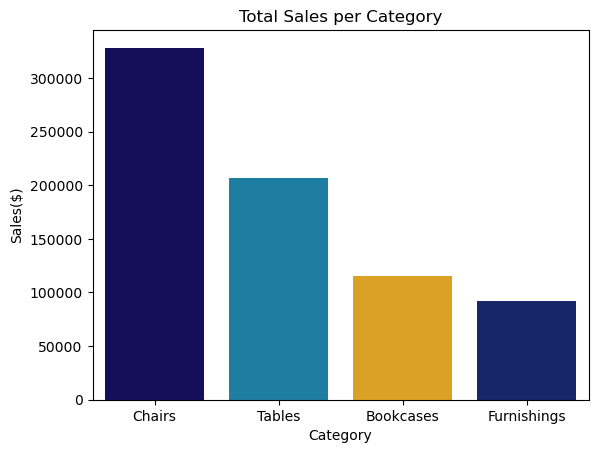

In [36]:
# plot for the total sales for each category
colors = ['#090364','#0888b7','#f9ac07','#091e75']
palette = sns.color_palette(colors)
category_sales = df.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette = palette)
plt.title('Total Sales per Category')
plt.ylabel('Sales($)')
plt.show()

# Profit Analysis

In [69]:
print("""
Quantity ordered, Sales and Profit for each State (sorted from Profit Analysis Prespective).""")
state_financials = df.groupby('State')[['Quantity', 'Total_Sales','Profit']].sum()
state_financials.sort_values(by='Profit', ascending=False)


Quantity ordered, Sales and Profit for each State (sorted from Profit Analysis Prespective).


,Quantity,Total_Sales,Profit
State,,,
California,1696,156064.61,9162.87
Washington,429,48020.16,7193.78
New York,877,93372.69,5857.71
Virginia,233,25321.95,5204.34
Michigan,184,22321.10,4675.55
Wisconsin,144,17256.61,3838.95
Kentucky,106,12126.84,3210.97
Indiana,83,11496.71,2181.26
Oklahoma,57,8284.10,2153.86


In [71]:
print("""
Quantity ordered, Sales and Profit for each City (sorted from Profit Analysis Prespective)
Top and Bottom 5 Cities :""")
state_financials = df.groupby('City')[['Quantity', 'Total_Sales','Profit']].sum()
state_financials.sort_values(by='Profit', ascending=False)


Quantity ordered, Sales and Profit for each City (sorted from Profit Analysis Prespective)
Top and Bottom 5 Cities :


,Quantity,Total_Sales,Profit
City,,,
Seattle,370,40995.88,6208.83
New York City,720,75691.03,5306.72
Detroit,106,16364.01,3332.68
Los Angeles,588,54000.03,3071.61
Henderson,70,8862.68,2239.97
...,...,...,...
Dallas,103,7306.88,-2023.17
Aurora,71,5239.98,-2591.18
Houston,291,23183.19,-3404.82


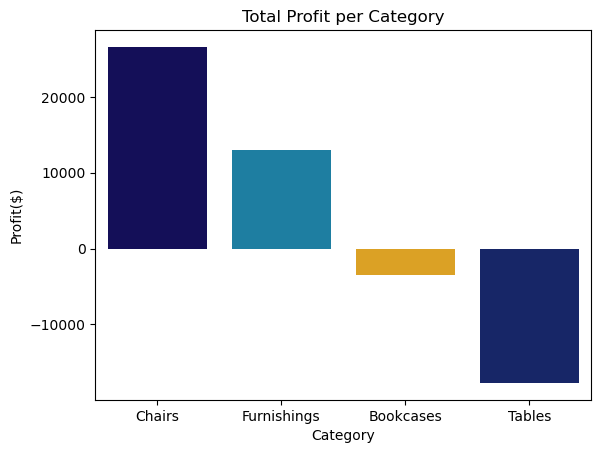

In [37]:
# plot for the total profit per category
# bookcases and tables have 0 profit
colors = ['#090364','#0888b7','#f9ac07','#091e75']
palette = sns.color_palette(colors)
category_sales = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette = palette)
plt.title('Total Profit per Category')
plt.ylabel('Profit($)')
plt.show()

In [38]:
df.head(2)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Region,Category,Product,Total_Sales,Price_Each,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.96,130.98,2,0.0,41.91
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,243.98,3,0.0,219.58


# Shipping Mode Analysis

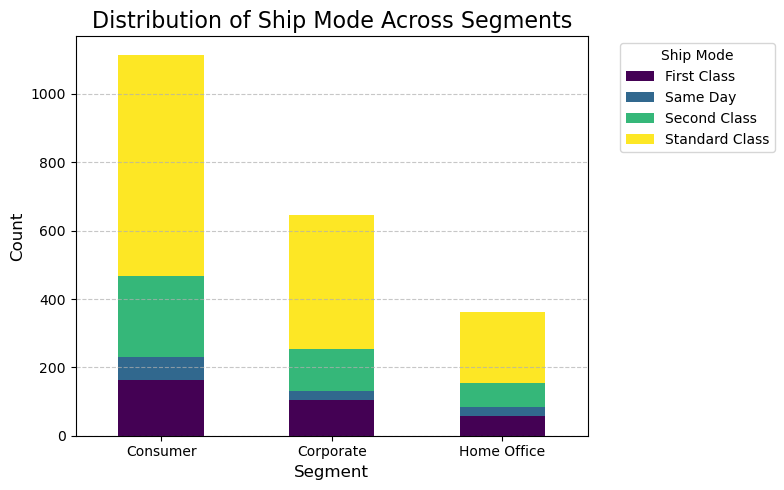

In [85]:
ship_mode_counts = df.groupby('Segment')['Ship_Mode'].value_counts().unstack()
# Plot the data using a stacked bar chart
ship_mode_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')

# Add chart title and labels
plt.title('Distribution of Ship Mode Across Segments', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Distribution of Ship Mode Across Segments
- The chart shows the usage of shipping modes across segments. Standard Class is the most used mode for all segments, followed by Second Class. Premium options like First Class and Same Day are less frequently used. The Consumer segment has the highest shipment volume, followed by Corporate, while Home Office has the lowest. This highlights a preference for cost-effective shipping options over premium ones.

# Segment Analysis

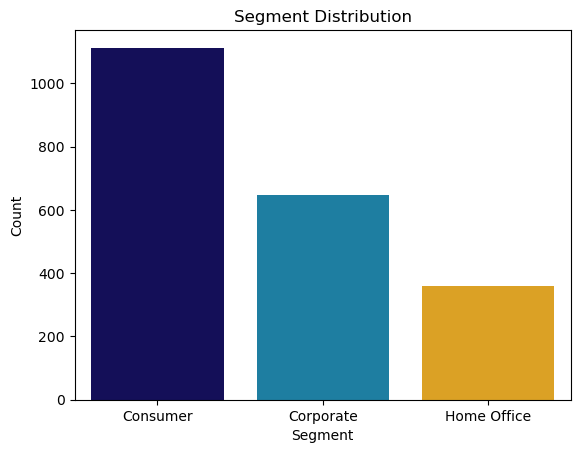

In [73]:
colors = ['#090364','#0888b7','#f9ac07']
palette = sns.color_palette(colors)
sns.barplot(x=df['Segment'].value_counts().index, y=df['Segment'].value_counts().values, palette=palette)
plt.title('Segment Distribution')
plt.ylabel('Count')
plt.show()

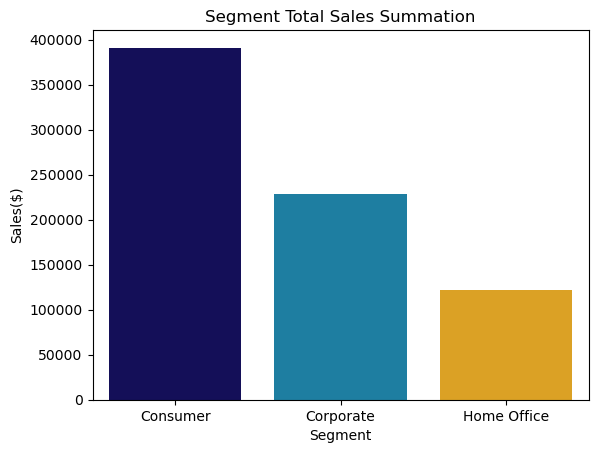

In [43]:
colors = ['#090364','#0888b7','#f9ac07']
palette = sns.color_palette(colors)
segment_profit = df.groupby('Segment')['Total_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=segment_profit.index, y=segment_profit.values, palette=palette)
plt.title('Segment Total Sales Summation')
plt.ylabel('Sales($)')
plt.show()

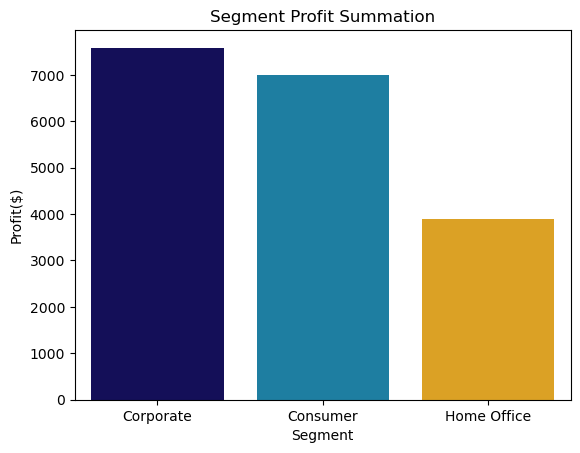

In [42]:
colors = ['#090364','#0888b7','#f9ac07']
palette = sns.color_palette(colors)
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=segment_profit.index, y=segment_profit.values, palette=palette)
plt.title('Segment Profit Summation')
plt.ylabel('Profit($)')
plt.show()

### Conclusion of the previous 2 Plots
- As Shown in the 3 above graphs, **consumer** customer type is the most appeared one in the dataset, with the most sales, however, the total profit for the **corporate** customers is higher than the **consumer**, so will do some analysis on the orders that were placed by the **corporate** customers

## Corporate Segment Analysis

In [46]:
# making a subset from the data that only include rows in which the consumer is coporate
df_corp = df[df['Segment'] == 'Corporate']

In [51]:
# west with the majority of the orders 
df_corp['Region'].value_counts()

Region
West       210
East       198
Central    137
South      101
Name: count, dtype: int64

In [52]:
# top state appeared in coporate orders
df_corp['State'].mode()[0]

'California'

In [54]:
# shipping mode most appeared for corporate orders
df_corp['Ship_Mode'].mode()[0]

'Standard Class'

In [62]:
# number of orders placed per category for corporate orders
print("""
CORPORATE Orders Analysis for Categories with the net Sales and net profit.
""")
co_analysis = df_corp.groupby('Category')[['Quantity','Total_Sales','Profit']].sum()
co_analysis.sort_values(by='Profit', ascending=False)


CORPORATE Orders Analysis for Categories with the net Sales and net profit.



,Quantity,Total_Sales,Profit
Category,,,
Chairs,719,99140.84,8344.68
Furnishings,1086,25001.27,3508.26
Bookcases,271,34005.91,638.48
Tables,419,70871.72,-4906.51


In [87]:
# saving the cleaned version of data to effectivly analyze it in Power BI
df=df.to_csv('sales_forecasting_cleaned.csv',index=False)